plot max temperature evolution AND beam profile AND SEM+Thermionic emission 

2024.03.27, mariusz.sapinski@psi.ch




In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#matplotlib notebook


In [16]:
# read simulation configuration file name
with open("Last.txt") as f:
    cfname=f.readlines()[1]
confname=cfname[26:]    
print(confname)    

CERN_SPS_BWS41677.txt 



In [17]:
# for WIRESCANNER option output only
#dft = pd.read_csv("MaxTempVSTime.txt", skiprows=3, delim_whitespace=True, names=["em","time","pos","maxT"])
#dfc = pd.read_csv("IntensityVSTime.txt", skiprows=3, delim_whitespace=True, names=["time","pos","curr"])

# new format
#df = pd.read_csv("PSI_pChann_MBPTWS.txt", skiprows=4)
df = pd.read_csv("Last.txt", skiprows=9)

print(df.columns)


Index(['#   Time [us]', ' Position [mm]', ' Npart', ' MaxTemp [K]',
       ' SEMcurr [uA]', ' THcurr [uA] '],
      dtype='object')


In [18]:
# rename columns
df.rename({"#   Time [us]":"time"," Position [mm]":"pos"," Npart":"npart"," MaxTemp [K]":"maxt"," SEMcurr [uA]":"isem"," THcurr [uA] ":"ithc"}, axis='columns',inplace=True)

In [19]:
#print(dfc)
print(df)

            time        pos         npart      maxt      isem          ithc
0          0.448  -1.500000  4.512007e+07   300.280  0.000601  8.394492e-92
1          0.896  -1.499552  4.526567e+07   300.562  0.000602  8.877474e-92
2          1.344  -1.499104  4.541169e+07   300.844  0.000604  9.389691e-92
3          1.792  -1.498656  4.555814e+07   301.127  0.000605  9.932992e-92
4          2.240  -1.498208  4.570502e+07   301.411  0.000607  1.050935e-91
...          ...        ...           ...       ...       ...           ...
99995  44798.208  43.297760  0.000000e+00  1629.277  0.000000  1.326313e-06
99996  44798.656  43.298208  0.000000e+00  1629.272  0.000000  1.326111e-06
99997  44799.104  43.298656  0.000000e+00  1629.267  0.000000  1.325910e-06
99998  44799.552  43.299104  0.000000e+00  1629.262  0.000000  1.325709e-06
99999  44800.000  43.299552  0.000000e+00  1629.257  0.000000  1.325508e-06

[100000 rows x 6 columns]


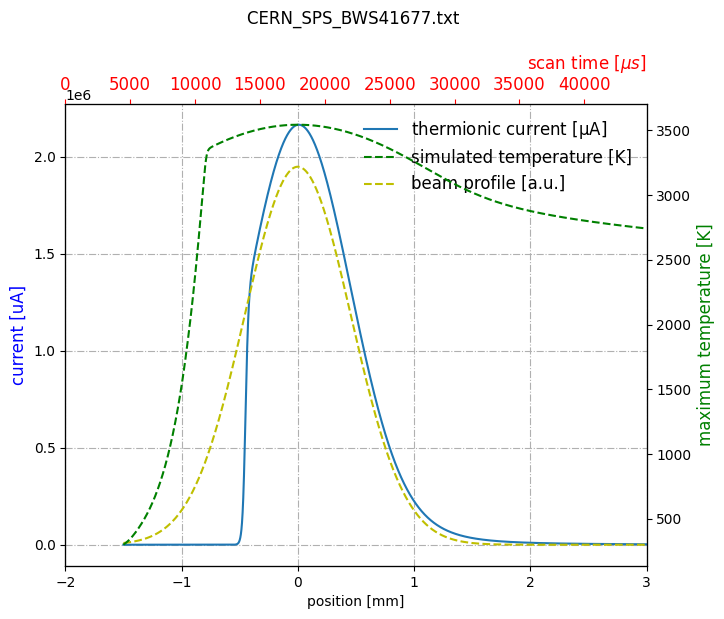

In [20]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

# factor 2 is for 2 wires
#hsimse, = ax.plot([x*1 for x in df["pos"]],[2*x for x in df["isem"]],label=r"SEM current [$\rm \mu A$]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[2*x/10 for x in df["ithc"]],label=r"thermionic current/10 [$\rm \mu A$]")
hsimit, = ax.plot([x*1 for x in df["pos"]],[x for x in df["ithc"]],label=r"thermionic current [$\rm \mu A$]")
#scale=3.0*df["isem"].max()/df["npart"].max()
scale=0.9*df["ithc"].max()/df["npart"].max()

hbeamp, = ax.plot([x*1 for x in df["pos"]],[scale*x for x in df["npart"]],"y--",label="beam profile [a.u.]")
ax.set_title(confname) 
#ax.set_ylim(0,0.6)
ax.grid(True, linestyle='-.')


axtemp = ax.twinx()
#axtemp.set_ylim(0,2800)
hsimt, = axtemp.plot([x*1 for x in df["pos"]],df["maxt"],'g--',label="simulated temperature [K]")
axtemp.set_ylabel("maximum temperature [K]", fontsize=12, color='g')

ax.set_xlabel("position [mm]")
ax.set_ylabel("current [uA]", fontsize=12, color='b')

axtime = ax.twiny()
tlimend=(df["time"].iloc[-1]-df["time"].iloc[0]) # ? 60 mm/s
axtime.set_xlim(0,tlimend)
axtime.set_xlabel(r"scan time [$\mu s$]",loc="right",fontsize=12, color='red', labelpad=5)
axtime.tick_params(axis='x', colors='red', labelsize=12)    #setting up X-axis tick color to red
#ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_xlim(-2,3)


#ax.legend(handles=[hsimse,hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
ax.legend(handles=[hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
#ax.grid()

plt.savefig('all.png')

In [9]:
print("dt [us] = ",df["time"].iloc[2]-df["time"].iloc[1])

dt [us] =  0.4710000000000001


In [10]:
# max SEM current [uA] 
print(4*max(df['isem']))

92.05379253427512
